In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [8]:
predicted_omegas = pd.read_csv('predicted_omega_values.csv', index_col=0)['omega_x']
original_omegas = pd.read_csv('tangent_omega_values.csv', index_col=0)['omega_x']
risk_free_rates = pd.read_csv('coefficients.csv', index_col=0)['risk_free_rate']
omegas = pd.merge(predicted_omegas, original_omegas, on='date', suffixes=('_predicted', '_original'))

In [9]:
omegas.head()

,omega_x_predicted,omega_x_original
date,,
2019-02-28,0.203934,0.237301
2019-03-31,0.599487,0.709003
2019-04-30,0.570990,0.471679
2019-05-31,0.532711,0.863963
2019-06-30,0.998061,1.151797


In [10]:
returns = pd.read_csv('returns.csv', index_col=0)
weights = pd.read_csv('weights.csv', index_col=0)
print(returns.head())
print(weights.head())

                ARKK       TLT     ^GSPC
2019-02-28  0.117083 -0.000986  0.053195
2019-03-31  0.003651  0.055717  0.017924
2019-04-30 -0.004428 -0.005789  0.027428
2019-05-31 -0.137442  0.068392 -0.065778
2019-06-30  0.147572  0.022140  0.054825
               ^GSPC           TLT          ARKK
2019-01-31  1.000000 -2.891829e-08  2.395681e-08
2019-02-28  1.000000  9.891161e-08  1.191396e-08
2019-03-31  0.378843  6.211566e-01  0.000000e+00
2019-04-30  0.535573  4.644267e-01  0.000000e+00
2019-05-31  0.187573  8.124273e-01  0.000000e+00


Original wealth: 1062072978.1394162
Predicted wealth: 1073020634.9322683


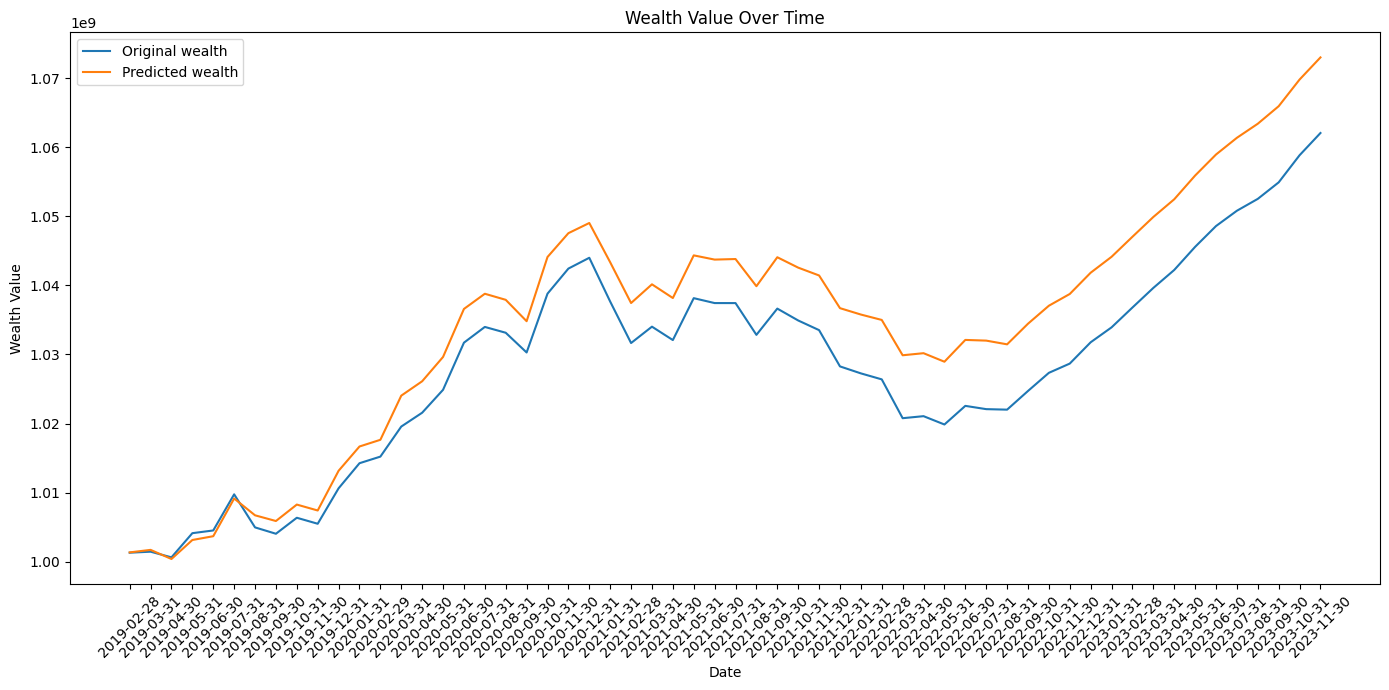

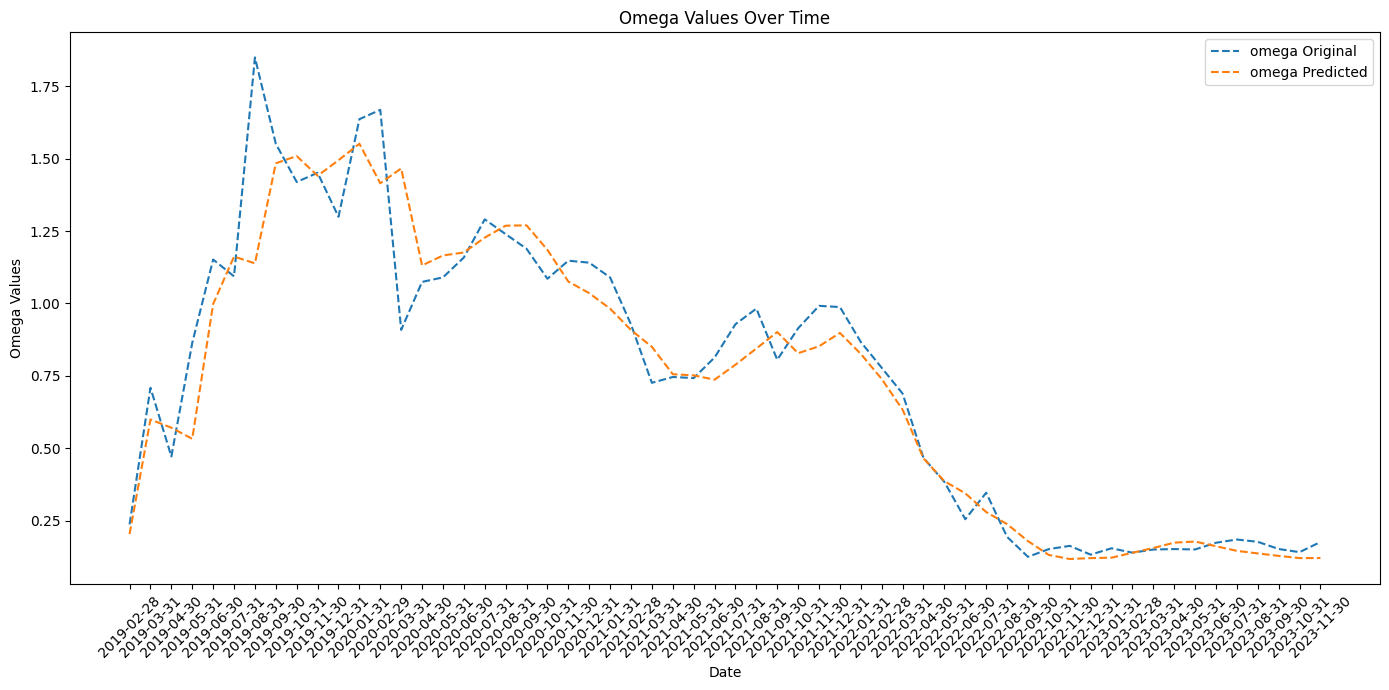

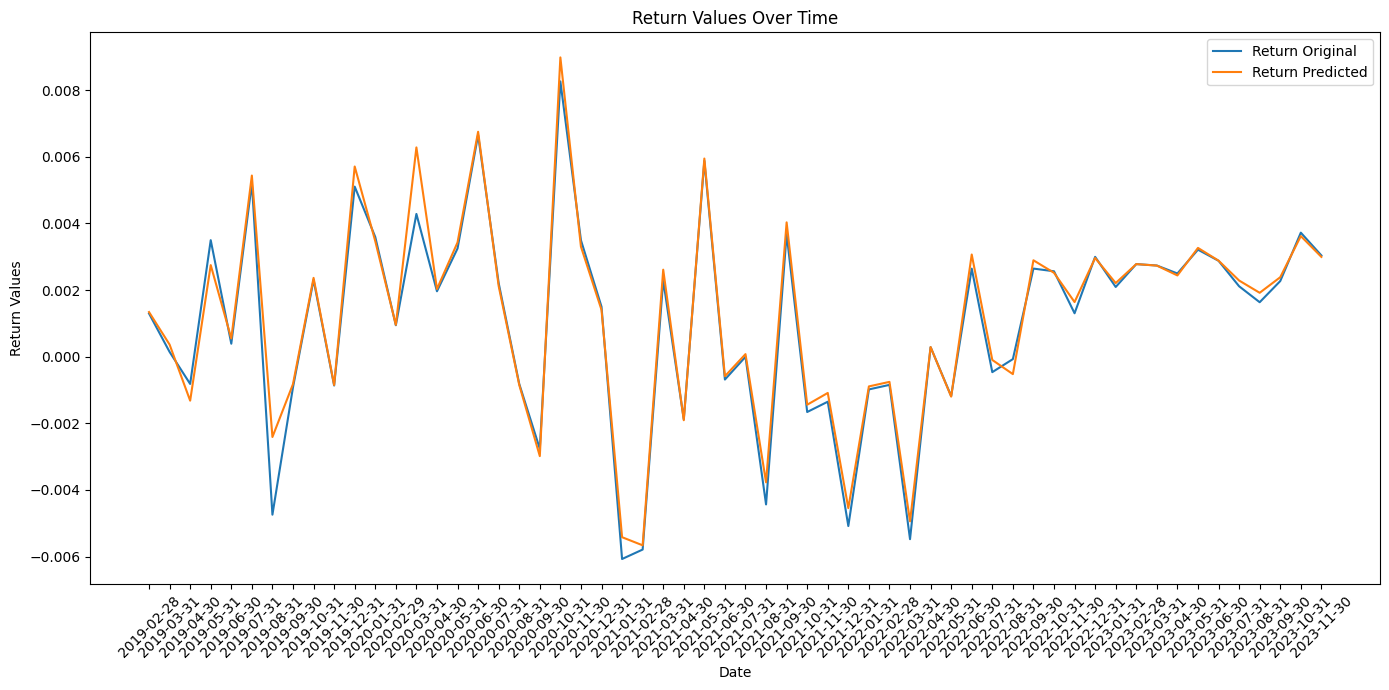

In [11]:
if not os.path.exists('result'):
    os.makedirs('result')

# Initialize wealths
wealth_original, wealth_predicted = 1000000000, 1000000000

# Lists to store wealth values over time for plotting
dates = []
wealth_values_original = []
wealth_values_predicted = []

# Lists to store omega and return values for plotting
omega_values_original = []
omega_values_predicted = []
return_values_original = []
return_values_predicted = []

# Loop through the date range
for i in range(len(pd.date_range("2019-02-28", "2023-12-31", freq="ME")) - 1):
    date = pd.date_range("2019-02-28", "2023-12-31", freq="ME")[i]
    next_month = pd.date_range("2019-02-28", "2023-12-31", freq="ME")[i + 1]

    date_str = date.strftime('%Y-%m-%d')
    dates.append(date_str)

    next_month_str = next_month.strftime('%Y-%m-%d')
    
    return_p = np.dot(weights.loc[date_str], returns.loc[next_month_str] / 12)
    risk_free_rate = risk_free_rates.loc[date_str] / 12
    
    original_omega = omegas.loc[date_str]["omega_x_original"]
    return_original = original_omega * return_p + (1 - original_omega) * risk_free_rate

    predicted_omega = omegas.loc[date_str]["omega_x_predicted"]
    return_predicted = predicted_omega * return_p + (1 - predicted_omega) * risk_free_rate
    
    wealth_original *= 1 + return_original
    wealth_predicted *= 1 + return_predicted
    
    # Store the wealth values for plotting
    wealth_values_original.append(wealth_original)
    wealth_values_predicted.append(wealth_predicted)
    
    # Store the omega and return values for plotting
    omega_values_original.append(original_omega)
    omega_values_predicted.append(predicted_omega)
    return_values_original.append(return_original)
    return_values_predicted.append(return_predicted)

# Final results
print(f"Original wealth: {wealth_original}")
print(f"Predicted wealth: {wealth_predicted}")

# Plotting wealth Values
plt.figure(figsize=(14, 7))
plt.plot(dates, wealth_values_original, label='Original wealth')
plt.plot(dates, wealth_values_predicted, label='Predicted wealth')
plt.xlabel('Date')
plt.ylabel('Wealth Value')
plt.title('Wealth Value Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('result/Portfolio_values_over_time.png')
plt.show()

# Plotting omega Values
plt.figure(figsize=(14, 7))
plt.plot(dates, omega_values_original, label='omega Original', linestyle='--')
plt.plot(dates, omega_values_predicted, label='omega Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Omega Values')
plt.title('Omega Values Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('result/Omega_over_time.png')
plt.show()

# Plotting Return Values
plt.figure(figsize=(14, 7))
plt.plot(dates, return_values_original, label='Return Original')
plt.plot(dates, return_values_predicted, label='Return Predicted')
plt.xlabel('Date')
plt.ylabel('Return Values')
plt.title('Return Values Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('result/Return_value_over_time.png')
plt.show()